In [1]:
library(Seurat)
library(SeuratData)
library(SeuratDisk)
library(reticulate)
library(celldex)
library(SingleR)

#ad <- import("anndata", convert = FALSE)
#sc <- import("scanpy")



Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, 

In [4]:

atlas.data <- sc$read_h5ad("basicQCAllCtrl.h5ad")
counts <- t(atlas.data$X)
colnames(counts) <-  atlas.data$obs_names$to_list()
rownames(counts) <-  atlas.data$var_names$to_list()


ERROR: Error in eval(expr, envir, enclos): object 'sc' not found


In [ ]:
counts <- Matrix::Matrix(as.matrix(counts), sparse = T)
seurat <- CreateSeuratObject(counts)
seurat <- AddMetaData(seurat,  atlas.data$obs)

In [ ]:
seurat

In [ ]:
seurat

In [ ]:
rds_temp = readRDS("Integrated_NSCLC_KRAS_STK_samples_tumor_44_samples_annotations.rds")

In [ ]:
rds_temp@assays$RNA

In [ ]:
full_rna <- CreateSeuratObject(rds_temp@assays$RNA)


In [ ]:
full_rna <- AddMetaData(full_rna,  rds_temp@meta.data)

In [ ]:
rds_temp

In [ ]:
seurat

In [ ]:
pbmc.combined <- merge(full_rna, y = seurat, add.cell.ids = c("Tumor", "Control"))


In [ ]:
pbmc.combined.

In [ ]:
#saveRDS(pbmc.combined, "FullMergedTumorCtrlRawAssay.rds")


In [ ]:
pbmc.combined = readRDS('FullMergedTumorCtrlRawAssay.rds')

In [ ]:
colnames(pbmc.combined@meta.data)

In [ ]:
filt_pbmc.combined <- subset(pbmc.combined, subset = percent.mt < 10 & predicted_doublets != 1)
filt_pbmc.combined

In [ ]:
#plan("multiprocess", workers = 10)

filt.list <- SplitObject(filt_pbmc.combined, split.by = "orig.ident")


In [ ]:
filt.list <- lapply(X = filt.list, FUN = SCTransform, method = "glmGamPoi")
features <- SelectIntegrationFeatures(object.list = filt.list, nfeatures = 3000)
filt.list <- PrepSCTIntegration(object.list = filt.list, anchor.features = features)
#filt.list <- lapply(X = filt.list, FUN = RunPCA, features = features)


In [ ]:
#saveRDS(filt.list, "ObjectsToIntegrate.rds")


In [2]:
#plan("multisession", workers = 2)
#plan()
#options(future.globals.maxSize= 3687091200)


multisession:
- args: function (..., workers = 2, envir = parent.frame())
- tweaked: TRUE
- call: plan("multisession", workers = 2)

In [2]:
filt.list <- readRDS('ObjectsToIntegrate.rds')
features <- SelectIntegrationFeatures(object.list = filt.list, nfeatures = 3000)

filt.list <- lapply(X = filt.list, FUN = RunPCA, features = features, npcs = 40)


PC_ 1 
Positive:  ANKRD36C, AUTS2, RAD51B, SDK1, NAALADL2, MACROD2, AHR, ZFP36L1, KCNQ1OT1, DNAH14 
	   SYNE2, IMMP2L, PNN, GLIS3, DANT2, RALGAPA2, AL050309.1, ALCAM, GMDS-DT, PATJ 
	   CCSER1, INPP4B, NR6A1, RUNX1, PPP1R10, SCMH1, DPYD, MNAT1, ANK3, RFX3-AS1 
Negative:  HECW2, INSR, ELMO1, GRB10, PTPRG, PTPRM, PLPP1, PLPP3, NRP2, HSPG2 
	   ARL15, PLCB1, DYSF, KIAA1217, FAM155A, GALNT18, APP, DOCK9, CBLB, PKP4 
	   RAPGEF1, AC119674.1, FYN, NRP1, PIK3R3, ETS1, MAGI1, PRKCH, SNTB1, KLHL5 
PC_ 2 
Positive:  INSR, ELMO1, GRB10, HECW2, ARL15, PIK3R3, SNED1, MT-CO3, MT-ND1, NFIB 
	   PLCB1, MT-CO2, HSPG2, RAD51B, CADPS2, LIMCH1, KIAA1217, ANKRD36C, PNN, MT-CO1 
	   RAPGEF1, PTPRM, PLPP3, MT-ND2, SDK1, MACROD2, FNBP1L, MT-ND3, MT-CYB, AHR 
Negative:  FN1, CALD1, EPS8, DOCK10, TNS3, PARD3, ARHGAP42, MIR4435-2HG, SPATS2L, ARHGAP10 
	   NRXN3, PAG1, TNS1, TPM1, RORA, MAP2, MAPK10, DST, NBEAL1, ITPR1 
	   CYTOR, DMD, HDAC9, HIP1, SYTL2, FILIP1L, ARHGEF17, PEAK1, FAT1, COBLL1 
PC_ 3 
Positive:  

PC_ 1 
Positive:  MT-CO1, MT-CO2, MT-ND4L, MT-ND4, MT-CO3, MT-ND1, MT-ND2, MT-ATP6, MTRNR2L12, MT-ND3 
	   MT-CYB, MT-ND5, MT-ATP8, MT-ND6, RPL41, S100A6, HSPA5, ACTB, RPL28, FTH1 
	   EEF1A1, PTMA, CTSD, FTL, RPL3, EEF1G, P4HB, RPS2, RPLP1, RPL18 
Negative:  RAD51B, MAST4, PDE4D, BCAT1, MBNL1, EFNA5, NCOA7, FAM172A, TTC28, FHIT 
	   BTBD9, XPR1, SGMS1, ST6GAL1, BBS9, NFIB, GSTCD, AHR, ATP8A1, MED13L 
	   ZBTB20, CHSY3, ARL15, FNDC3B, IMMP2L, PLCB1, GPR39, METTL15, TNIK, EXOC4 
PC_ 2 
Positive:  ATAD2, HELLS, CENPP, TMPO, BRCA1, NCAPD3, CYTOR, BARD1, PRIM2, EZH2 
	   NSD2, STMN1, SMC4, WDHD1, FANCA, FAM111A, POLA1, PTMA, S100A6, RTTN 
	   H2AFV, MCM3, MYO19, MIS18BP1, RGS3, SLC20A1, DNMT1, PALLD, CKAP5, ZNF718 
Negative:  MAPK10, PCAT1, KIAA0825, UBA6-AS1, ATP8A1, MT-CO2, DNAH5, MT-CYB, MT-ND3, AL008633.1 
	   MT-CO3, AC008014.1, MT-ATP6, MT-CO1, RFX3-AS1, MT-ND4, KLHL24, C8orf37-AS1, ZNF322, FAM13A 
	   UNC13B, MT-ND4L, SNED1, TTC28, BDNF-AS, BBS9, PLD1, NBEA, BCAS3, SYNE1 
PC_ 3 
Pos

PC_ 1 
Positive:  EEF1A1, ACTB, FTL, ACTG1, RPL28, S100A6, RPL41, IFITM3, RPS6, RPLP1 
	   RPS18, RPS2, CFL1, FTH1, RPS8, RPS3, RPL13, RPL3, PFN1, HSP90AB1 
	   RPLP0, EEF1G, RPS14, RPL18, HSP90AA1, RPL10, B2M, MYL6, PPIA, FAU 
Negative:  RPRD1A, PDE4D, EFNA5, SMYD3, PTPRG, GPHN, DPYD, IMMP2L, THSD4, SOX5 
	   DOCK4, PITPNC1, TTC28, PTPRM, SH3RF3, MCTP2, RANBP17, EXOC4, SDK1, VPS8 
	   GMDS, CDK14, FMNL2, SBF2, RASAL2, PARD3, ADK, JAZF1, L3MBTL4, DLG1 
PC_ 2 
Positive:  TSC22D3, FN1, NEAT1, ZBTB16, BNIP3L, KLHL24, NDRG1, MBNL2, CITED2, IRS2 
	   PNRC1, WSB1, CBLB, FTH1, NEBL, HBP1, BCL6, FTL, HERPUD1, FGD4 
	   FILIP1L, ANKRD28, SAMD4A, SLC38A2, MAML3, ELL2, PSAP, ESYT2, UBC, JUND 
Negative:  SMC4, CIT, CENPP, WDHD1, FANCA, GPR39, HELLS, NCAPD3, RPRD1A, PARP1 
	   ZNF331, BRCA1, MT-ND6, NRP2, PRIM2, ITGA6, ITPK1, TMPO, L3MBTL4, PKP4 
	   ID1, HLA-DMA, PRKCE, SDK1, PDE3B, NDC1, CMSS1, SLC20A1, BARD1, PRKDC 
PC_ 3 
Positive:  FMNL2, EXOC6B, AGAP1, BIRC6, RBMS1, PRKCE, SH3RF3, CYTOR, THAD

PC_ 1 
Positive:  RPL30, RPL10, EEF1A1, RPL41, RPLP1, RPL28, RPL13, RPS2, RPL18, RPS18 
	   RPS7, RPS3, RPS8, RACK1, ACTB, RPS14, RPL3, RPL15, RPL11, RPLP0 
	   FTH1, FAU, PPIA, NACA, RPL14, FTL, ACTG1, S100A6, RPS6, RPL36A 
Negative:  NAALADL2, PPM1L, PLEKHA7, MAML2, PLCB1, NEAT1, EFNA5, LRMDA, HDAC9, RALGAPA2 
	   DPYD, TMTC2, ANKRD36C, WWOX, AC008014.1, ZBTB20, IKZF2, PTPRK, INPP4B, STK39 
	   IMMP2L, PDE4D, RORA, ETV6, BCAS3, MALAT1, FTX, TMEM117, PCAT1, NR6A1 
PC_ 2 
Positive:  MT-CO2, MT-CO1, MT-CO3, MT-ATP6, MT-ND4, MT-CYB, MT-ND4L, MT-ND3, MT-ND5, MTRNR2L12 
	   MT-ATP8, PTMS, MT-ND2, MT-ND1, IFITM3, VIM, S100A6, DHCR24, HLA-B, ATAD2 
	   SDK1, CTSC, FRMD4B, PPIA, B2M, SELENOW, ITGA3, CD44, FN1, CALD1 
Negative:  HSPA5, GFPT1, FTL, TXNRD1, HERPUD1, SEC24D, NIBAN1, MAP2, HSP90B1, NDRG1 
	   GCLC, ATF3, ARFGEF3, FTH1, NUCB2, PPIB, DNAJC3, PDIA4, DNAJB11, PLPP5 
	   AARS, SQSTM1, XBP1, SSR3, HK2, SEC61B, LPIN2, WARS, CALR, PDIA3 
PC_ 3 
Positive:  FN1, SDK1, FRMD4B, MTSS1, TANC2, 

PC_ 1 
Positive:  RPLP1, RPL41, FTL, PFN1, CFL1, RPS3, PPIA, FTH1, RPS2, PTMA 
	   HSP90AB1, RPL18, RPL28, RPS14, RPS6, IFITM3, FAU, RPS18, ACTB, RPL13 
	   SERF2, HSP90AA1, RPS7, RPL30, RPL15, HSPA8, EEF1A1, MYL6, CHCHD2, RPS8 
Negative:  NRXN3, BCL2L13, TRIO, RANBP17, SMYD3, PARD3B, MCTP2, PDE7B, WWOX, RORA 
	   FAM155A, TTC28, GLIS3, MAST4, RAD51B, FHIT, NEAT1, EFNA5, LRMDA, IMMP2L 
	   NCKAP5, FNDC3B, SDK1, PDE4D, RASAL2, PARD3, OPHN1, AUTS2, DMD, PTPRM 
PC_ 2 
Positive:  IGFBP4, TM4SF1, CALU, CANX, ADAM9, SERPINH1, B4GALT1, HSP90B1, PLOD2, FLNA 
	   SLC39A6, APP, IFITM3, P4HB, RANBP17, TRIO, TXNDC5, DDAH1, MTRNR2L12, OPHN1 
	   PPIB, NRP2, PDIA3, KDELR2, CALD1, FN1, TEAD1, MYO1E, IGF1R, TIMP1 
Negative:  CELF2, PRKCH, CHST11, TOX, INPP4B, RBPJ, ANKRD44, DOCK8, ATP8A1, SEMA4D 
	   CBLB, FYN, FKBP5, PIP4K2A, SP100, RABGAP1L, IKZF3, ELMO1, RESF1, TXNIP 
	   SYNE2, PARP8, EVL, TC2N, TSPAN5, PAG1, AKNA, NIBAN1, SLC38A1, LYST 
PC_ 3 
Positive:  MT-ND3, MT-ATP6, MT-CO3, MT-CO2, MT-ND2, M

PC_ 1 
Positive:  FTL, FTH1, HLA-A, ERO1A, B2M, LDHA, HLA-B, RPL10, PTTG1IP, EEF1A1 
	   HSPA5, RPL41, RPLP1, S100A6, ACTB, PGK1, HLA-C, UBC, RPS3, RPS14 
	   FAU, RPL30, AHNAK, MYL12A, NDRG1, KRT7, RPL18, RPS2, APLP2, RPL28 
Negative:  NEAT1, PDE4D, WWOX, ANK3, ANKRD36C, MCTP2, SDK1, PLCB1, LRMDA, DOCK4 
	   DPYD, SMYD3, MALAT1, MAML2, AHR, AUTS2, STK39, DLEU1, CBLB, RORA 
	   DNAH5, ELMO1, MGAT5, MCTP1, FHIT, PKP4, EXOC4, ARHGAP26, CAMKMT, PCAT1 
PC_ 2 
Positive:  DNAH5, SPATA17, MAPK10, TMEM232, STK33, DYNC2H1, RFX2, MOK, NEK11, PTGES3 
	   EFHC1, CC2D2A, CHCHD2, IFT57, ULK4, PTMA, LRRC6, SPA17, NUDC, TAGLN2 
	   HMGB3, CCDC40, HSP90AA1, FBXL13, IQCH, CSPP1, CCP110, DNAAF4, POGLUT3, IQCG 
Negative:  ERO1A, PTTG1IP, FTL, HLA-A, NDRG1, MAP2, SERINC2, IMMP2L, HSPA5, GPRC5A 
	   GRIP1, WSB1, TXNIP, THSD4, SAMD4A, ID1, HLA-C, HLA-B, CPM, GLS 
	   PDZD2, PTPRM, LMO7, FLNA, ZNF83, KRT7, EHBP1, ERRFI1, EFNA5, FN1 
PC_ 3 
Positive:  S100A6, ATP1B1, GSTP1, CYB5A, KRT18, CTSC, DHCR24, PPIA, HM

PC_ 1 
Positive:  MT-CO1, MT-CO3, MT-ND1, MT-ATP6, MT-ND3, MT-ND4L, MT-CO2, MT-ND4, MT-CYB, MT-ND2 
	   MT-ND5, MTRNR2L12, MT-ATP8, MT-ND6, ANKRD36C, MTRNR2L8, EEF1A1, RASGEF1B, DGKH, HSP90AA1 
	   AHNAK, RPS2, GPC5, ANXA2, NEK11, TMEM232, SPATA17, HLA-A, PLEKHA5, DST 
Negative:  PTPN13, ITPR2, ABCC4, CACNB4, ERBB4, MAGI3, KAZN, FMO5, SPRY4-AS1, PTPRM 
	   DLEU1, UNC13B, CIT, SPAG9, DUSP1, AUTS2, ATP11A, SNX30, MAST4, KANK1 
	   CD44, CADPS2, TXNIP, DTNB, LRMDA, DAPK1, TMEM164, SLC39A8, SMYD3, RORA 
PC_ 2 
Positive:  TMEM232, SPATA17, NEK11, STK33, ULK4, CCDC146, KIAA0825, WDR78, SOX5, FANK1 
	   DMD, SPAG1, CSPP1, TMEM67, DYNC2H1, LRRC6, FBXL13, EFHC1, IQCH, AK9 
	   PTPRN2, DNAH5, DGKH, CCDC40, BBS9, CC2D2A, C8orf37-AS1, AC046134.2, AZIN1-AS1, MOK 
Negative:  MT-CO3, MT-ND1, MAGI3, MT-ND3, ABCC4, MT-ATP6, ATP11A, DLEU1, GLS, MT-CO2 
	   MT-CYB, PTPN13, EPS8, CIT, GLCCI1, GPC5, CD55, NRP1, MAST4, CADPS2 
	   RBPMS, AUTS2, PTPRG, RAI14, FAM155A, MT-CO1, BTBD9, ITPR2, MT-ATP8, PRKCA 
PC

PC_ 1 
Positive:  MT-CO1, RPLP1, MT-ND4L, MT-ND5, ACTB, RPL41, RPL28, EEF1A1, SPINT2, MT-CO2 
	   PDIA4, MT-CYB, MT-ND1, MT-ND4, RPLP0, FTH1, MT-CO3, PDIA3, PTMA, MT-ATP6 
	   FTL, MT-ND2, RPS2, RPL13, B2M, RPL3, RPL10, CALR, CANX, RPL30 
Negative:  SDK1, NAALADL2, KAZN, PDE4D, NEAT1, SOX5, NBEA, CCSER1, TOX, JAZF1 
	   DOCK1, PRKAG2, LRMDA, DPYD, DNAH5, FTX, MALAT1, ANK3, TNIK, SOX6 
	   AHR, PLCB1, ELMO1, TMTC2, SMYD3, WSB1, SGMS1, PCAT1, NFIA, TANC2 
PC_ 2 
Positive:  KAZN, NCALD, SDK1, PLCL1, INPP4B, DISC1, MIPOL1, JAZF1, MT-CO3, MT-CO2 
	   MT-CYB, MT-CO1, DAPK1, MT-ATP6, ELMO1, MT-ND1, SNTB1, MT-ND6, DOCK1, WWOX 
	   MT-ND2, KREMEN1, PRORP, MT-ATP8, L3MBTL4, PTPN13, MT-ND4L, PHF8, SYNE2, MT-ND5 
Negative:  NDRG1, ERRFI1, CCNY, PTPRM, FRY, FAM13A, WSB1, PLOD2, P4HA1, NCKAP5 
	   PGK1, EFNA5, SAMD4A, LPP, PAG1, CHSY1, ENO1, VEGFA, SNX25, NAMPT 
	   ERO1A, PCSK6, NEAT1, FN1, TANC2, SLC22A23, NRP2, LDHA, CD55, GALNT18 
PC_ 3 
Positive:  ATAD2, SMC4, HELLS, CENPP, POLA1, GLS, EZH2, NC

PC_ 1 
Positive:  MT-CO1, MT-CO3, MT-CO2, MT-ND5, GMDS, MT-ND4L, HLA-B, MT-CYB, MT-ND4, MT-ATP6 
	   HLA-A, PTPRN2, MT-ND1, MT-ATP8, MT-ND2, TBC1D8, MT-ND3, HLA-C, BACE2, AHNAK 
	   MTRNR2L12, B2M, PRKCA, MYO1E, DMD, RASGEF1B, SQLE, INPP4B, ITGA6, ACTG1 
Negative:  FAM155A, SDK1, PTPRG, AUTS2, CELF2, MACROD2, AL008633.1, ITGA9, PTPN13, ELMO1 
	   FMO5, PLPP3, SNX30, MYH10, F3, DOCK5, SLC20A1, ACSL1, MAPK10, CEP70 
	   SNX25, DAPK2, SORCS2, SECISBP2L, FOXO1, RANBP17, GEM, LIMCH1, ZFAND5, POLR3H 
PC_ 2 
Positive:  PTPRN2, GMDS, TBC1D8, PRKCA, MTSS1, INPP4B, DMD, BACE2, MYO1E, EPS8 
	   TMEM117, ARHGEF2, GULP1, RASGEF1B, ATAD2, AHR, RHOBTB1, PVT1, PLEKHA5, FOXN3 
	   CCSER1, ITGA6, ATXN7L1, SQLE, TBC1D1, DST, MCU, ASAP1, PTPRM, SBF2 
Negative:  MT-CO1, MT-CO3, MT-ND5, MT-CO2, MT-CYB, MT-ND4L, MT-ND4, MT-ND1, MT-ATP6, MT-ATP8 
	   B2M, MTRNR2L12, MT-ND3, MT-ND2, MT-ND6, HLA-B, HSPA5, HLA-C, HLA-A, PDIA3 
	   SDK1, CYBA, HSP90B1, CANX, CTSD, IFITM3, CALR, PPIB, SLC20A1, EEF1A1 
PC_ 3 
Posit

PC_ 1 
Positive:  SLCO3A1, ITPR2, ERBB4, SMC4, MT-CO3, NCALD, CIT, PBX3, HELLS, MT-CO2 
	   CENPP, WWOX, PAM, MT-ND2, MT-ND4L, NAALADL2, MT-ND3, MT-ATP6, MT-ND5, MT-ND4 
	   OSBPL10, MT-CYB, CADPS2, MT-CO1, FANCA, MT-ATP8, SCLT1, RGS3, STK33, BRCA1 
Negative:  ERRFI1, NAMPT, OSMR, ZBTB16, ARHGAP26, PDE4D, FOXO1, NEDD4L, TCF7L2, SVIL 
	   NEBL, ELL2, F3, TACC2, SIPA1L1, SAMD4A, CD55, FKBP5, FNDC3B, FN1 
	   WSB1, DPYD, WWTR1, YAP1, SLC38A2, ANTXR2, PTPRK, CHST15, THSD4, TNFAIP8 
PC_ 2 
Positive:  ERBB4, CCSER1, STXBP5, FAM155A, PDE4D, MAPK10, NRXN3, AC008014.1, RORA, KAZN 
	   NBEA, ATXN1, ARHGAP26, MCTP1, NEBL, NCKAP5, TOX, FRY, PLCB1, MACROD2 
	   WWOX, GRIP1, MAP2, TRIM5, RBPMS, BBS9, GBE1, DNAH5, PRKN, SVIL 
Negative:  MTRNR2L12, MT-CO1, MT-ND4L, FTL, MT-CYB, MT-ND5, MT-ND4, MT-CO2, FTH1, MT-ND1 
	   EEF1A1, MT-ATP6, MT-ND2, MT-CO3, ACTB, MT-ATP8, GSTP1, RPLP1, PTMA, HSP90AB1 
	   RPS2, RPL41, RPL3, ACTG1, RPS18, EEF2, RPL28, HSP90AA1, CFL1, RPL13 
PC_ 3 
Positive:  FTH1, FTL, PTMA,

PC_ 1 
Positive:  ACTB, FTL, S100A6, PPIA, B2M, RPL41, EEF1A1, FTH1, HSP90AB1, EEF2 
	   CD63, PTMA, ACTG1, RPLP1, RPL13, KRT8, RPS2, CFL1, LDHA, KRT7 
	   MYL6, CTSD, RPL28, GSTP1, HLA-A, PFN1, RPL10, RPS18, RPL18, RPS8 
Negative:  ANKRD36C, NEAT1, MBNL1, SDK1, DPYD, BTBD9, DOCK4, ETV6, IMMP2L, SPIDR 
	   MAST4, PRKCA, EFNA5, SORCS2, TMEM117, TANC2, TRIO, NAALADL2, WSB1, ANK3 
	   SAT1, FNDC3B, EXOC4, INPP4B, VMP1, FUT8, PDE4D, ZBTB20, CADPS2, MAML2 
PC_ 2 
Positive:  TMEM117, MBOAT2, GLS, THSD4, NDRG1, F3, KRT7, MPRIP, DCBLD2, BICD1 
	   WSB1, SLC20A1, BZW1, CAB39, RASAL2, NRP1, ERRFI1, PALLD, RALGPS2, AHNAK 
	   BCAR3, SEMA3B, RASA2, TET3, ADK, S100A6, HK2, ITGA3, ACTB, HDAC9 
Negative:  LRIG3, ANKRD36C, DOCK4, MAST4, SORCS2, MT-CO3, IFT80, MT-CO2, MT-ATP6, ST5 
	   SMC4, SDK1, MT-CO1, MT-CYB, ERBB4, SOD2, BTBD9, PDE4D, MT-ND2, MT-ND4L 
	   MT-ND4, MT-ND1, MTRNR2L12, MT-ND5, MTUS1, MT-ND3, MAPK10, PLA2R1, ANK3, SLC7A11 
PC_ 3 
Positive:  NDRG1, ERO1A, FTH1, FTL, WSB1, ANKRD36C, SOD2

PC_ 1 
Positive:  PARP8, CHST11, PIP4K2A, FYN, PRKCH, MT-CO1, ETS1, FKBP5, SYTL3, NIBAN1 
	   DOCK10, MT-ND3, TRERF1, STK10, MT-ATP6, SEMA4D, PITPNC1, INPP4B, PDE3B, DOCK8 
	   ELMO1, RESF1, SMAP2, RBPJ, MT-CO2, AKNA, ZC3HAV1, MT-CO3, PCNX1, CNOT6L 
Negative:  NCKAP5, EMP2, ATF7IP2, LMO7, GPC5, AC027288.3, NEDD4L, LIMCH1, MAGI3, DAPK2 
	   SHROOM3, NEBL, ALCAM, MAGI1, GPRC5D-AS1, EPB41L5, SLC39A8, GPRC5A, RAB11FIP1, TACC1 
	   NXN, WWC2, RANBP17, VEGFA, MAP2, SNX25, CD55, NAV2, PDE4D, SH3RF1 
PC_ 2 
Positive:  PDE4D, RNLS, MACROD2, DNAH5, NEAT1, TMEM232, PTPRG, ERBB4, SDK1, MAPK10 
	   ANK3, STK33, AUTS2, MT-ND3, SOX5, ARFGEF3, GLIS3, SPATA17, EFNA5, SNX25 
	   KAZN, PTPN13, MAST4, MT-ATP6, FANK1, EPS8, FRMD4B, MT-ND2, MLPH, KIAA1217 
Negative:  NCKAP5, EMP2, ATF7IP2, AC027288.3, PARP8, GPC5, LMO7, CHST11, PIP4K2A, ETS1 
	   FYN, GPRC5D-AS1, NIBAN1, PRKCH, PITPNC1, VEGFA, RAB11FIP1, AGTPBP1, RESF1, DAPK2 
	   ANKRD44, CCND3, DOCK10, SEMA4D, SYTL3, ARAP2, STK10, ZC3HAV1, TRERF1, DENND3 

PC_ 1 
Positive:  MT-CO1, MT-CO3, MT-ND2, MT-CO2, TFRC, FKBP5, CHST11, SMCHD1, MT-ND3, MT-ND4 
	   SMAP2, RAPGEF1, PDE3B, RBPJ, FYN, MT-ATP6, PARP8, MT-ND1, ELMO1, DOCK10 
	   CNOT6L, DOCK8, CCDC88A, TXNIP, SIPA1L1, MT-CYB, RNF149, MT-ND5, JARID2, SNX9 
Negative:  PDE4D, NCKAP5, GPC5, MACROD2, EMP2, LMO7, NEDD4L, ANK3, SYNE1, LIMCH1 
	   ERBB4, SHROOM3, GPRC5A, PTPRG, MAGI1, SOX5, GPRC5D-AS1, ATF7IP2, TACC2, MICAL2 
	   NEAT1, SNX25, MAGI3, NXN, RAB11FIP1, NEBL, PARD3, PTPRK, ATP11A, MAST4 
PC_ 2 
Positive:  NCKAP5, EMP2, DST, SAMD4A, ATF7IP2, MAP2, LMO7, AC027288.3, PALLD, BMPR2 
	   CALD1, PPFIBP1, PALM2-AKAP2, PEAK1, ANO6, VEGFA, BMPR1A, MAP4, LIMCH1, RASAL2 
	   RAB11FIP1, DAPK2, PARD3B, ULK4, VCL, TNS1, RORA, TNXB, MYH10, DOCK4 
Negative:  PDE4D, MACROD2, ANK3, ERBB4, TANC2, CAMK1D, ANKRD28, MT-CO1, MT-CO3, TOX 
	   EFNA5, BTD, NEAT1, MT-ATP6, MT-ND4, ARFGEF3, BTBD9, MT-CO2, SOX5, GAREM1 
	   SPRY4-AS1, AUTS2, EPS8, PTPRG, MT-ND3, SNTB1, MAST4, SYNE1, ASPH, MTUS1 
PC_ 3 
Positive:

In [ ]:
#immune.anchors <- FindIntegrationAnchors(object.list = filt.list, normalization.method = "SCT", 
#anchor.features = features, dims = 1:30, reduction = "rpca", k.anchor = 20)


In [3]:
immune.anchors <-readRDS('AnchorsTumorCtrlIntegratedAssay.rds')

In [ ]:
immune.combined.sct <- IntegrateData(anchorset = immune.anchors, normalization.method = "SCT", dims = 1:30,
                                    k.weight = 50)

In [4]:

saveRDS(immune.combined.sct, "FullMergedTumorCtrlIntegratedAssay.rds")


Merging dataset 43 into 28

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights



ERROR: Error in idx[i, ] <- res[[i]][[1]]: number of items to replace is not a multiple of replacement length


In [ ]:
features <- SelectIntegrationFeatures(object.list = filt.list, nfeatures = 3000)

filt.list <- lapply(X = filt.list, FUN = RunPCA, features = features, npcs = 40)

In [ ]:
for (x in filt.list){
    print(ncol(x = x))
}

In [ ]:
head(Stdev( filt.list[[1]], reduction = "pca"))


In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = filt.list, normalization.method = "SCT",
    anchor.features = features, dims = 1:30, reduction = "rpca", k.anchor = 20)


In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = filt.list, normalization.method = "SCT",
    anchor.features = features, dims = 1:30, reduction = "rpca", k.anchor = 20)
immune.combined.sct <- IntegrateData(anchorset = immune.anchors, normalization.method = "SCT", dims = 1:30)


In [ ]:
saveRDS(immune.combined.sct, "FullMergedTumorCtrlIntegratedAssay.rds")


In [ ]:
"""# normalize and identify variable features for each dataset independently
filt.list <- lapply(X = filt.list, FUN = function(x) {
    
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
    x <- ScaleData(x, verbose = FALSE)

    x <- RunPCA(x, npcs = 30, verbose = FALSE)

})

# select features that are repeatedly variable across datasets for integration
features <- SelectIntegrationFeatures(object.list = filt.list)
immune.anchors <- FindIntegrationAnchors(object.list = filt.list, anchor.features = features,
                                         reduction='rpca' )
immune.combined <- IntegrateData(anchorset = immune.anchors)


"""

In [3]:
immune.combined <- readRDS("Full500MergedTumorCtrlIntegratedAssay.rds")
DefaultAssay(immune.combined) <- "integrated"

In [4]:


# Run the standard workflow for visualization and clustering
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 27 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


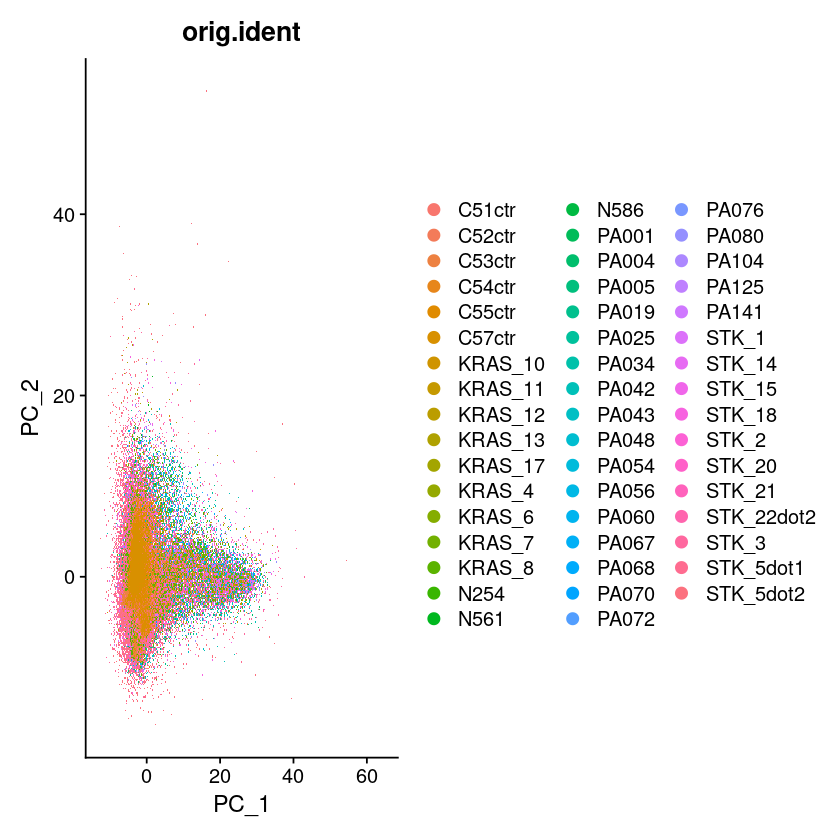

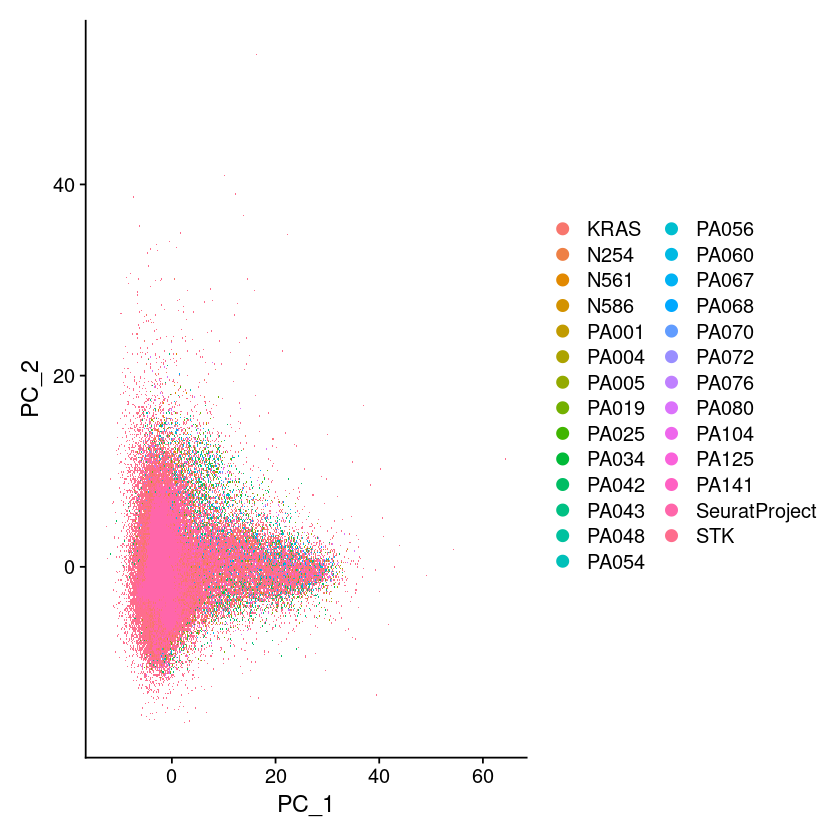

In [7]:
 DimPlot(immune.combined, reduction = "pca", group.by = "orig.ident")
 DimPlot(immune.combined, reduction = "pca", label = TRUE, repel = TRUE)


In [8]:
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
07:18:51 UMAP embedding parameters a = 0.9922 b = 1.112

07:18:51 Read 177230 rows and found 30 numeric columns

07:18:51 Using Annoy for neighbor search, n_neighbors = 30

07:18:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:19:46 Writing NN index file to temp file /tmp/RtmpEsAxBS/file4ed79a9427a

07:19:46 Searching Annoy index using 1 thread, search_k = 3000

07:21:27 Annoy recall = 97.2%

07:21:27 Commencing smooth kNN distance calibration using 1 thread

07:21:38 Initializing f

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 177230
Number of edges: 7200779

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9032
Number of communities: 935
Elapsed time: 83 seconds


895 singletons identified. 40 final clusters.



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



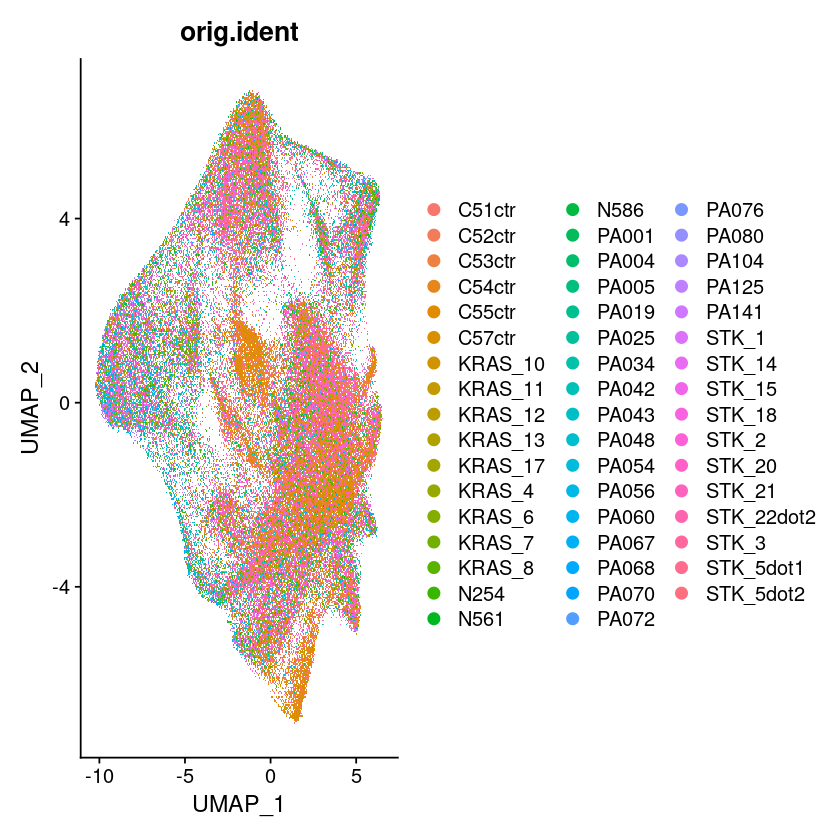

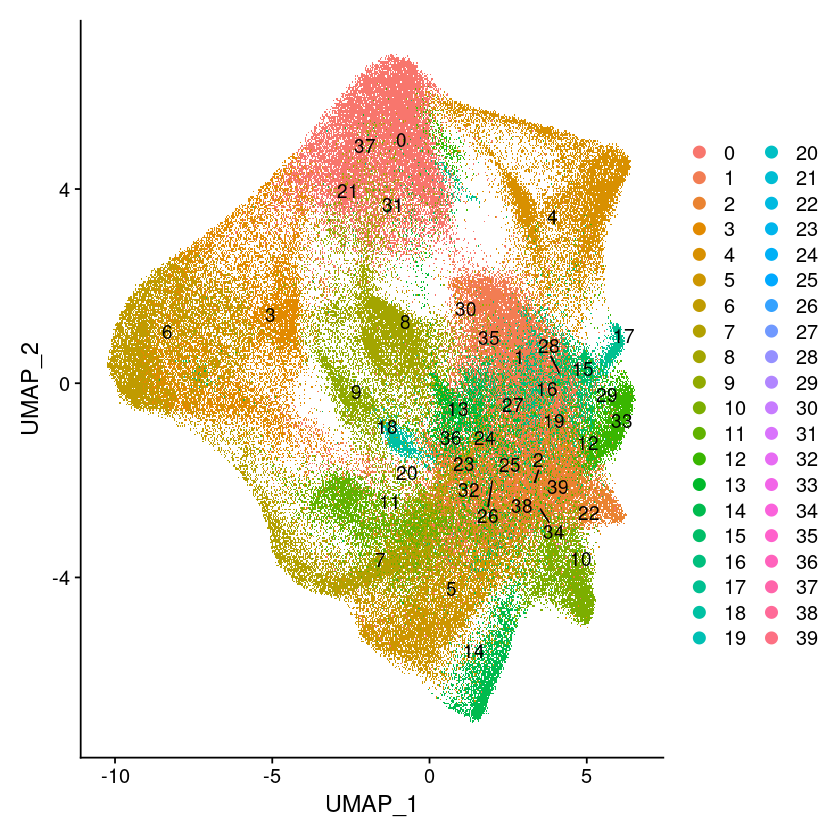

In [9]:
 DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")
 DimPlot(immune.combined, reduction = "umap", label = TRUE, repel = TRUE)


In [15]:
write.table(as.matrix(GetAssayData(object = immune.combined,assay = "integrated", slot = "scale.data")), 
            'Integrated_Files/integrated_data.csv', 
            sep = ',', row.names = T, col.names = T, quote = F)

In [27]:
write.table(immune.combined@meta.data, "Integrated_Files/TumorSampleIntegratedMetaData.txt",
            sep = '\t', row.names = T, col.names = T, quote = F)

In [19]:
(row.names(immune.combined@assays$integrated))

[1] "FN1"         "MT-CO1"      "FTL"         "MTRNR2L12"   "MT-CO3"     
  [6] "MT-CO2"      "MT-ND4"      "MT-ATP6"     "FTH1"        "MT-ND4L"    
 [11] "MT-ND2"      "MT-ND1"      "S100A6"      "MT-ND3"      "GPC5"       
 [16] "MT-CYB"      "RPLP1"       "FAM155A"     "NDRG1"       "SOX5"       
 [21] "ERBB4"       "RPL41"       "B2M"         "SAMD4A"      "SDK1"       
 [26] "NCKAP5"      "HDAC9"       "PDE4D"       "MT-ND5"      "ANKRD36C"   
 [31] "ELMO1"       "RPL28"       "EEF1A1"      "RPL3"        "NRXN3"      
 [36] "VIM"         "ACTB"        "RPS18"       "DCLK1"       "PTMA"       
 [41] "HSPA5"       "INPP4B"      "CHST11"      "MAP2"        "HSP90AA1"   
 [46] "TOX"         "MT-ATP8"     "CALD1"       "PLCL1"       "CASC15"     
 [51] "KAZN"        "RPL30"       "RPL13"       "ATF3"        "EFNA5"      
 [56] "AL008633.1"  "RPS8"        "HSPH1"       "DOCK10"      "HLA-A"      
 [61] "SOX6"        "DPYD"        "RPS6"        "DMD"         "RPS2"       
 [66] "GLS"         "NEAT1"       "FYN"         "FAM13A"      "RPS14"      
 [71] "PDE3B"       "MACROD2"     "GLIS3"       "MAML2"       "DCBLD2"     
 [76] "ANK3"        "ERRFI1"      "AC073529.1"  "PTPRG"       "PTPRN2"     
 [81] "WSB1"        "CHSY3"       "PDIA4"       "PDE7B"       "RORA"       
 [86] "ODC1"        "FOS"         "RPS3"        "GULP1"       "ZBTB16"     
 [91] "NAMPT"       "HLA-B"       "CIT"         "TXNIP"       "AUTS2"      
 [96] "EMP2"        "ZSCAN31"     "RPLP0"       "NCALD"       "CTSD"       
[101] "EEF2"        "RPL15"       "PALLD"       "HSP90B1"     "AHNAK"      
[106] "PPIA"        "ULK4"        "UBC"         "MT-ND6"      "NEBL"       
[111] "NIBAN1"      "ITGA6"       "PLCB1"       "ITGA1"       "CD55"       
[116] "WWOX"        "ZC3HAV1"     "LRMDA"       "SAT1"        "RPL18"      
[121] "DNAH5"       "ACTG1"       "CDK14"       "PTPN13"      "DOCK4"      
[126] "RPL10"       "PPCDC"       "FAU"         "LEPR"        "TNIK"       
[131] "GEM"         "MCTP1"       "LIMCH1"      "TIMP1"       "DOCK8"      
[136] "NAALADL2"    "RPS7"        "CCSER1"      "IFITM3"      "SLCO3A1"    
[141] "PDZD2"       "CENPP"       "ARHGAP26"    "SLC20A1"     "NR4A1"      
[146] "SNTB1"       "L3MBTL4"     "MAML3"       "NEDD4L"      "ST6GAL1"    
[151] "MAPK10"      "EPHA4"       "THSD4"       "GRIP1"       "SOD2"       
[156] "HSP90AB1"    "CACNB4"      "RPL36A"      "CELF2"       "CPM"        
[161] "KCNQ1OT1"    "HK2"         "MTSS1"       "AKT3"        "SH3RF3"     
[166] "GSTP1"       "SLC9A9"      "WARS"        "STK33"       "SORCS2"     
[171] "CD63"        "NRP2"        "RPL14"       "HMGB3"       "AHR"        
[176] "EEF1G"       "DST"         "FKBP5"       "TM4SF1"      "PLPP1"      
[181] "SYNE1"       "ETS1"        "CFL1"        "P4HA1"       "MAST4"      
[186] "SLC7A11"     "PITPNC1"     "PLOD2"       "NEDD9"       "ST3GAL1"    
[191] "TACC2"       "RPS24"       "FRY"         "RPL12"       "PFN1"       
[196] "RPL24"       "ZFPM2-AS1"   "TACC1"       "JUN"         "RASGEF1B"   
[201] "FHIT"        "GLCCI1"      "AC068587.4"  "GALNT18"     "LARGE1"     
[206] "TMEM232"     "F3"          "DAB1"        "AC119674.1"  "DNM3"       
[211] "SNHG14"      "FMNL2"       "SYTL3"       "MBOAT2"      "CD44"       
[216] "GCLC"        "STMN1"       "LRIG3"       "ATP1B1"      "DUSP1"      
[221] "RPL11"       "VEGFA"       "RPL4"        "PARD3B"      "RNF220"     
[226] "ERO1A"       "ALCAM"       "PRKCA"       "AC027288.3"  "HSPA8"      
[231] "NAV2"        "PTPRM"       "KRT18"       "ATAD2"       "DISC1"      
[236] "SMC4"        "CALR"        "PCSK6"       "KRT8"        "KLF6"       
[241] "IMMP2L"      "HLA-C"       "PELI1"       "FOXO1"       "CPD"        
[246] "TENT5A"      "PAG1"        "H3F3A"       "RUNX1"       "ABCA1"      
[251] "APBB2"       "PIK3R3"      "MAGI3"       "C8orf37-AS1" "GBE1"       
[256] "SLC22A23"    "CAMK1D"      "GPRC5A"      "XBP1"        "DANT2"      
[261] "AL050309.1"  "LMCD1-AS1"   "UBE2E2"      "M

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: !head Integrated_Files
          ^
